In [18]:
from PIL import Image
import numpy as np



先下載 MNIST 資料


In [19]:
import os
import urllib
from urllib.request import urlretrieve
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print("\rdownloading: %5.1f%%"%(a*b*100.0/c), end="")
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urlretrieve(origin, dataset, reporthook=reporthook)

In [20]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

In [21]:
# 設定好訓練及測試資料
train_X, train_y = train_set
test_X, test_y = test_set
# 設定成我們的格式
train_X = train_X[..., None]
test_X = test_X[..., None]


In [22]:
# 有 10 種類別，輸入的是 784 維
print(train_X.shape)
np.unique(train_y)

(50000, 784, 1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
print(train_y[:20])
print(train_X[:2])
showX(train_X[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [24]:
# 參考範例 softmax regression
W = np.random.normal(size=(10, 784))
b = np.random.normal(size=(10, 1))
n_data = train_X.shape[0]
# 紀錄 loss
loss_history = []
accuracy_history = []
for epoch in range(5000):    
    idx = np.random.choice(n_data, 300, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    one_y = np.eye(10)[y][..., None]
    d = np.exp(W @ X + b)
    q = d/d.sum(axis=(1,2), keepdims=True)
    loss = -np.log(q[range(len(y)), y]).mean()
    loss_history.append(loss)
    accuracy = (q.argmax(axis=1).ravel() == y).mean()
    accuracy_history.append(accuracy)
    if epoch%100 == 0:
        print(epoch, accuracy, loss)
    grad_b_all = q - one_y
    
    grad_b = grad_b_all.mean(axis=0)
    grad_W_all = grad_b_all @ X.swapaxes(1,2)
    grad_W = grad_W_all.mean(axis=0)
    #W -= grad_W
    #b -= grad_b    
    W -=  5*((5001-epoch)/5000)*grad_W
    b -= 5*((5001-epoch)/5000)*grad_b    


0 0.11666666666666667 12.909352840904806
100 0.8633333333333333 0.954037505673518
200 0.84 1.0719008474547953
300 0.8866666666666667 0.7035951149210773
400 0.8633333333333333 1.0990561662683644
500 0.8766666666666667 1.1291493202535094
600 0.9033333333333333 0.5830072398256971


KeyboardInterrupt: 

In [ ]:
# test data 的正確率
((W @ test_X + b).argmax(axis=1).ravel() == test_y).mean()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# 準確率的圖
plt.plot(accuracy_history);

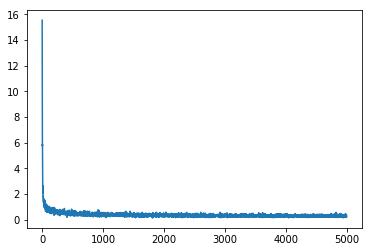

In [17]:
# loss 的圖
plt.plot(loss_history);

In [10]:
def softmax(x):
    t = np.exp(x)
    return t/t.sum(axis=(-2,-1),keepdims=True)
def relu(x):
    return np.maximum(x, 0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 微分
def Drelu(x):
    return (x>0).astype('float32')
def Dsigmoid(x):
    q = sigmoid(x)
    return q * (1-q) 
    # or 
    #return np.exp(x)/(1+np.exp(-x))**2

In [12]:
# 參考範例 feedforward network
from time import time
accuracy_history = []
γ = 0.02
A = np.random.normal(size=(50,784))
b = np.random.normal(size=(50,1))
C = np.random.normal(size=(10,50))
d = np.random.normal(size=(10,1))
t0 = time()
for epochs in range(20):
    idx = np.random.choice(n_data, n_data, replace=False)
    for i in idx:
        x = train_X[i]
        y = train_y[i]
        U_ = A@x+b
        U = relu(U_)
        q = softmax(C@U+d)
        L = - np.log(q[y])[0]
        p = np.eye(10)[y][:, None]
        grad_d = q - p
        grad_C = grad_d @ U.T
        grad_b = (C.T @ grad_d ) * Drelu(U_)
        grad_A = grad_b @ x.T
        A -= γ * grad_A
        b -= γ * grad_b
        C -= γ * grad_C
        d -= γ * grad_d    
    score = ((C@relu(A@test_X+b)+d).argmax(axis=1).ravel()==test_y).mean()
    print(epochs, score, "%.1f"%(time()-t0), L)
print(time()-t0)

0 0.8734 6.6 8.152258272412241e-05
1 0.9074 12.8 0.0006194167737233243
2 0.919 18.8 0.018400479880608344
3 0.9195 24.8 1.3967877439780948e-06
4 0.9322 30.8 0.016393042525905975
5 0.919 36.3 5.382363784317965e-07
6 0.9415 41.8 0.0015946212351222076
7 0.943 47.5 0.00014586893937500444
8 0.9419 53.0 2.0653381745176865e-05
9 0.9393 58.9 8.964334204043084e-09
10 0.9439 64.8 3.914086156934638e-05
11 0.9417 70.6 0.0002179279842376507
12 0.9437 76.4 0.007605099306217928
13 0.9362 82.3 1.9006732257737167e-08
14 0.9506 88.2 1.494049672926395e-08
15 0.9455 94.6 0.0001722348540664671
16 0.9498 100.1 2.751956444292042e-09
17 0.9423 106.1 0.0006485231565329761
18 0.9507 112.1 0.0037793822463524328
19 0.9504 117.8 0.006487557424663896
117.77693891525269


In [11]:
a = np.array([[2,3,4,5]])
si = sigmoid(a.T)